# Phase 1
### - Read wm 
### - Read mm
### - Read Sync test

# some questions:

1. What units is the acceleromter generating?
<font color=red> Ans: data file implies (g). Need to convert to m/sec2
2. Do I need to remove the effects of acceleration due to gravity? (https://stackoverflow.com/questions/6085583/how-can-i-find-the-velocity-using-accelerometers-only)
3. Do I need to account for sensor rotation? (https://stackoverflow.com/questions/6085583/how-can-i-find-the-velocity-using-accelerometers-only)
4. Should the scales for both acclerations (RF and accelerometer) be the same if they have the same units??

# Resources
- https://www.youtube.com/watch?v=eqZgxR6eRjo (how IMUs work)
- https://www.youtube.com/watch?v=0rlvvYgmTvI (How to do sensor fusion)

## Sensor orientation

### MM: https://docs.google.com/presentation/d/1Rdox_xnmT3ixkT-CzPN4canIJqrt_pWd/edit#slide=id.p1
### WM: 

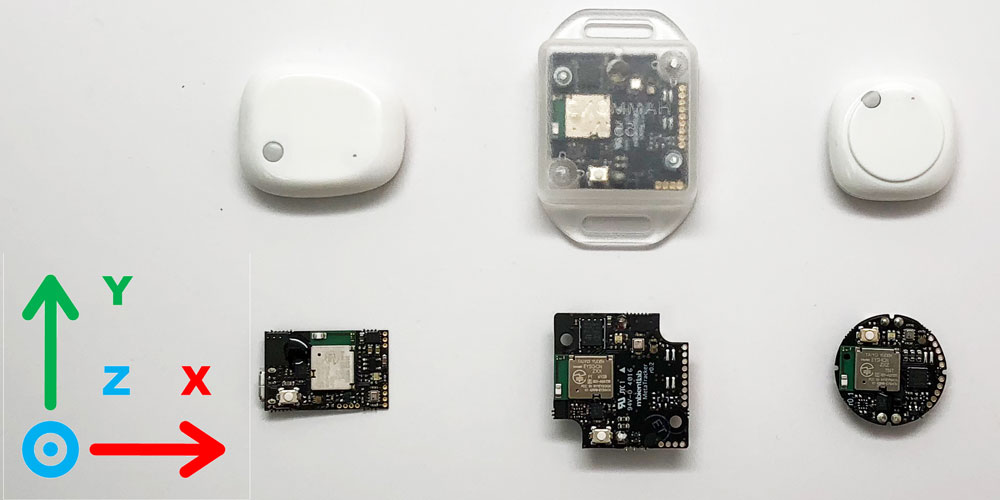

 ### &#9658; <font color=red> Observation: Both are aligned (but wm needs 180 degree rotation)

## Helpful links from mbientlab 
python tutorials: https://mbientlab.com/tutorials/Orientation.html

data sheet: https://www.bosch-sensortec.com/products/motion-sensors/imus/bmi270/

In [1]:
# read mm
import sys
sys.path.append("./library")

from fileload_utils import *
from metrics_utils import *


In [9]:
# 
wm_readpath = "/Users/calvinperumalla/Library/CloudStorage/Box-Box/Pugh Lab Shared Drive/4. Data Base/Wireless sensor and Motion Monitor Pilot/wm_vs_mm/wireless_motion_sensor_data/*"
mm_readpath = "/Users/calvinperumalla/Library/CloudStorage/Box-Box/Pugh Lab Shared Drive/4. Data Base/Wireless sensor and Motion Monitor Pilot/wm_vs_mm/wm analysis/*"

In [10]:
from glob import glob
mm_files = glob(mm_readpath)

In [11]:
def load_motion_data_from_cubes_2test(data_filename,sensor_orientation, sensorCount):
    time = []
    timestamps = []
    t = 0
    X = []
    Y = []
    Z = []
    ignore_to = 20 # number of samples to ignore in the beginning
    with open(data_filename, 'r') as fh:
        lines = fh.read().splitlines()
        data = []
        for line in lines[1 + ignore_to:]:
            l_arr = []
            x_arr = []
            y_arr = []
            z_arr = []
            for i, l in enumerate(filter(lambda x: x!='', line.split(' '))):
                #print(line)
                if 'Sensor' in l or '0x' in l:
                    continue
                
                if (i - 2) % 11 == 0:
                    x_arr.append(l)
                if (i - 3) % 11 == 0:
                    y_arr.append(l)
                if (i - 4) % 11 == 0:
                    z_arr.append(l)
                # time 
                if (i-10) % 11 == 0:
                    ts  = float(l)
                    
            X.append(x_arr)
            Y.append(y_arr)
            Z.append(z_arr)
            time.append(t)
            timestamps.append(ts)
            t += 1
        X = np.array(X, dtype=float)/1000  # converting mm to meter
        Y = np.array(Y, dtype=float)/1000  # converting mm to meter
        Z = np.array(Z, dtype=float)/1000  # converting mm to meter
        time = np.array(time)/100
        
    return 100, np.array(time/100), timestamps, X, Y, Z

In [12]:
sensor_orientation = [0]
sampling_freq,time_n, ts_n, X_n,Y_n,Z_n = load_motion_data_from_cubes_2test(mm_files[0], sensor_orientation, 1)

In [13]:
nmes = os.listdir('/Users/calvinperumalla/Library/CloudStorage/Box-Box/Pugh Lab Shared Drive/4. Data Base/Wireless sensor and Motion Monitor Pilot/wm_vs_mm/wm analysis')




In [14]:
list(map(lambda x: x[:-4], nmes))

['wv',
 'pthlength',
 'sync',
 'idletime_5s',
 'acc',
 'velocity',
 'idletime_10s',
 'pthlength_vert',
 'velocity_2',
 'idletime_1s']

In [15]:
motion_naming = {
 'wv': 'wv',
 'pthlength': 'pth',
 'sync':'sync',
 'idletime_5s':'idle5',
 'acc': 'acc',
 'velocity':'vel',
 'idletime_10s': 'idle10',
 'pthlength_vert':'pthvert',
 'velocity_2':'vel2',
 'idletime_1s':'idle1'
}

In [16]:
keynames = list(motion_naming.values())

In [17]:
#data = {{[{}, {}]}}

In [18]:
from datetime import datetime
def convert(s, ms=False):
    denom = 1
    if ms:
        denom = 1000
    return datetime.fromtimestamp(s/denom)

In [19]:
data = {}
for fname in glob(mm_readpath):
    sampling_freq, time, ts, X, Y, Z = load_motion_data_from_cubes_2test(fname, sensor_orientation=[0], sensorCount=1)
    mode = fname.split('/')[-1][:-4]
    actual_mode = motion_naming[mode]
    elems = [{'x':X[i,0], 'y':Y[i,0], 'z':Z[i,0], 'ts':convert(ts[i])} for i in range(X.shape[0])]
    data[actual_mode] = {'mm': elems}

## reading wireless motion data

In [20]:
def read_wm(file_name):
    elems = []
    with open(file_name, 'r') as fh:
        lines = fh.read().splitlines()[1:]
        for line in lines:
            l = line.split(',')
            ts = float(l[0])
            x = float(l[-3])
            y = float(l[-2])
            z = float(l[-1])
            elems.append({'x':x, 'y':y, 'z':z, 'ts':convert(ts, ms=True)})
    return elems

In [21]:
wm_files = glob(wm_readpath)

In [22]:
wnmes = os.listdir("/Users/calvinperumalla/Library/CloudStorage/Box-Box/Pugh Lab Shared Drive/4. Data Base/Wireless sensor and Motion Monitor Pilot/wm_vs_mm/wireless_motion_sensor_data/")





In [24]:
wm_naming = {
 'wv': 'wv',
 'pthlength': 'pth',
 'Sync':'sync',
 'idletime_5s':'idle5',
 'acc': 'acc',
 'velocity':'vel',
 'idletime_10s': 'idle10',
 'pthlength_vert':'pthvert',
 'idletime_1s':'idle1'
}

In [25]:
for fname in glob(wm_readpath):
    mode = fname.split('/')[-1][:-4]
    if not mode in wm_naming:
        continue
    actual_mode = wm_naming[mode]
    elems = read_wm(fname)
    data[actual_mode]['wm'] = elems

## Sync test

data = {
    'acc' : {
                'wm': [{'x': 'y':, 'z':, 'ts':}, {'x': 'y':, 'z':, 'ts':}, ...]
            }
}


In [27]:
# data['acc']['wm']

In [57]:
# get time stamps for random mode
# st = data['sync']['wm'][0]['ts']
# end = data['sync']['wm'][-1]['ts']

st = max(data['sync']['wm'][0]['ts'], data['sync']['mm'][0]['ts'])
end = min(data['sync']['wm'][-1]['ts'], data['sync']['mm'][-1]['ts'])

wm_times = [elem['ts'] for elem in data['sync']['wm'] if elem['ts'] > st and elem['ts'] < end]
mm_times = [elem['ts'] for elem in data['sync']['mm'] if elem['ts'] > st and elem['ts'] < end]

wm_vals = [elem['y'] for elem in data['sync']['wm'] if elem['ts'] > st and elem['ts'] < end]
mm_vals = [elem['y'] for elem in data['sync']['mm'] if elem['ts'] > st and elem['ts'] < end]

In [31]:
from matplotlib import pyplot as plt

In [284]:
# from collections import Counter
# c = Counter(int(d.timestamp()) for d in mm_times)

In [285]:
# i, j = zip(*(c.items()))
# plt.plot(i, j)

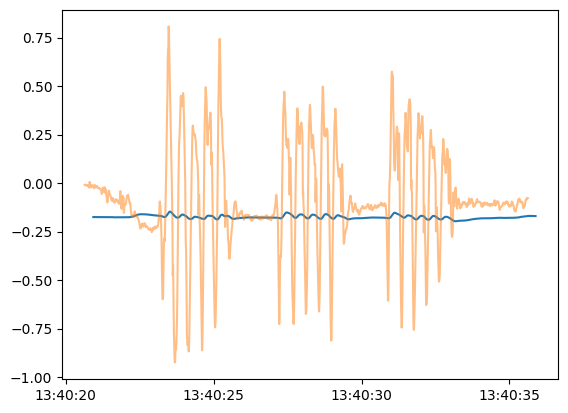

In [76]:
from datetime import timedelta
s = 0 
e = 1500
wm_times_ad = [d + timedelta(seconds= -0.29) for d in wm_times]
plt.plot(mm_times[s:e], mm_vals[s:e]) # blue
#plt.plot(wm_times[s:e], wm_vals[s:e], alpha = 0.5) # orange
plt.plot(wm_times_ad[s:e], wm_vals[s:e], alpha = 0.5) 

# plt.plot(list(np.zeros(677)) + mm_vals[s:e])
# plt.plot(wm_vals[s:e])
# plt.axvline(900)
# plt.xlim(0, 2000)

In [68]:
import numpy as np
corr = np.correlate(mm_vals[s:e], wm_vals[s:e], mode='full')

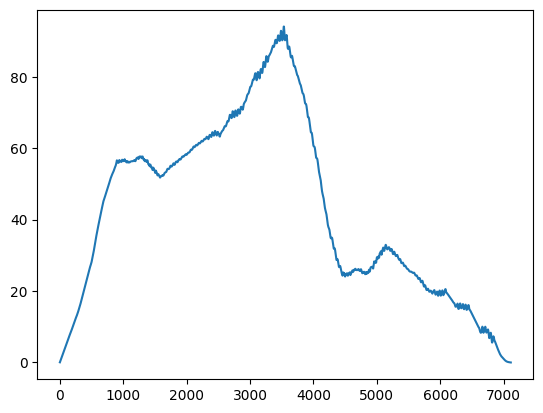

In [69]:
plt.plot(corr)

In [70]:
time_delta_seconds = (len(mm_vals)  - np.argmax(corr))/100 # sampling rate

In [71]:
time_delta_seconds 

0.29

# Phase 2: metric calculation

------------------------------> wm signal lags the mm signal by 310 milliseconds <-------------------------------------

## Idle Time - 10 seconds

In [336]:
print(wm_naming.values())

dict_values(['wv', 'pth', 'sync', 'idle5', 'acc', 'vel', 'idle10', 'pthvert', 'idle1'])


In [352]:
t_m, x_m, y_m, z_m = get_mm('idle10')
t_w, x_w, y_w, z_w = get_wm('idle10')

In [351]:
def get_wm(key):
    time = [elem['ts'], ms=True) for elem in data[key]['wm']]
    x = [elem['x'] for elem in data[key]['wm']]
    y = [elem['y'] for elem in data[key]['wm']]
    z = [elem['z'] for elem in data[key]['wm']]
    return time, x, y, z

def get_mm(key):
    time = [convert(elem['ts']) for elem in data[key]['mm']]
    x = [elem['x'] for elem in data[key]['mm']]
    y = [elem['y'] for elem in data[key]['mm']]
    z = [elem['z'] for elem in data[key]['mm']]
    return time, x, y, z

In [167]:
def get_data(key, time_delta_secs, srate, filthigh=True):
    g = 9.81 # accelaration due to gravity
    if filthigh:
        _get_d_w = lambda x: g * np.array(butter_lowpass_filter([elem[x] for elem in data[key]['wm'] if elem['ts'] > st and elem['ts'] < end], 5, srate,3))
        _get_d_m = lambda x: np.array(butter_lowpass_filter([elem[x] for elem in data[key]['mm'] if elem['ts'] > st and elem['ts'] < end], 5, srate,3))
    else:
        _get_d_w = lambda x: g * np.array([elem[x] for elem in data[key]['wm'] if elem['ts'] > st and elem['ts'] < end])
        _get_d_m = lambda x: np.array([elem[x] for elem in data[key]['mm'] if elem['ts'] > st and elem['ts'] < end])
    
    time_delta_ms = timedelta(seconds=time_delta_secs)    
    st = max(data[key]['wm'][0]['ts'], data[key]['mm'][0]['ts'])
    end = min(data[key]['wm'][-1]['ts'], data[key]['mm'][-1]['ts'])
    
    time_w = [(elem['ts'] + time_delta_ms) for elem in data[key]['wm'] if elem['ts'] > st and elem['ts'] < end]
    time_m = [elem['ts'] for elem in data[key]['mm'] if elem['ts'] > st and elem['ts'] < end]
    
    x_w_ = _get_d_w('x')
    y_w_ = _get_d_w('y')
    z_w_ = _get_d_w('z')

    x_m_ = _get_d_m('x')
    y_m_ = _get_d_m('y')
    z_m_ = _get_d_m('z')
    
    
    return time_m, x_m_, y_m_, z_m_, time_w, x_w_, y_w_, z_w_

In [168]:
t_m, x_m, y_m, z_m, t_w, x_w, y_w, z_w = get_data('idle10', time_delta_secs=-0.29, srate=100)

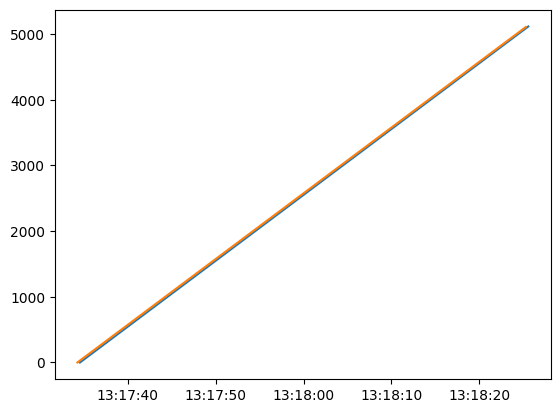

In [169]:
plt.plot(t_m, list(range(len(t_m))))
plt.plot(t_w, list(range(len(t_w))))

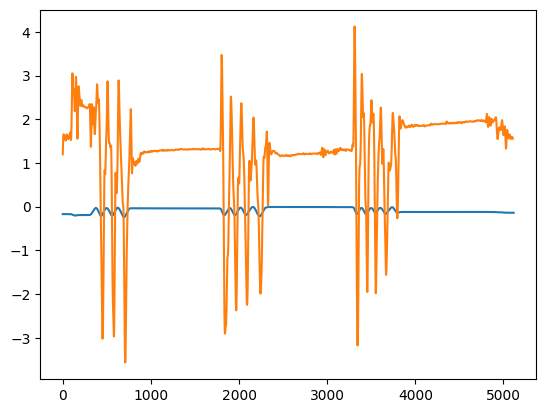

In [171]:
plt.plot(y_m)
plt.plot(y_w)

### &#9658; <font color=red> Observation: accelerometer acceleration shows a 0.1 acceleration while at rest. We are expecting 0. Is this acceleration due to gravity. If it is why is not 9.8 <font/>

### &#9658; <font color=red> Observation: also observing a drift <font/>

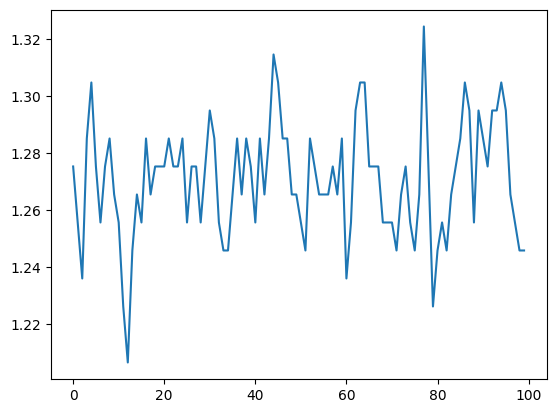

In [113]:
plt.plot(y_w[1000: 1100])

### &#9658; <font color=red> Observation: In 1 second there are at least 30-50 peaks. This indicates noise. Going to use a low pass filter to remove high frequency noise <font/>

## High frequency noise removal

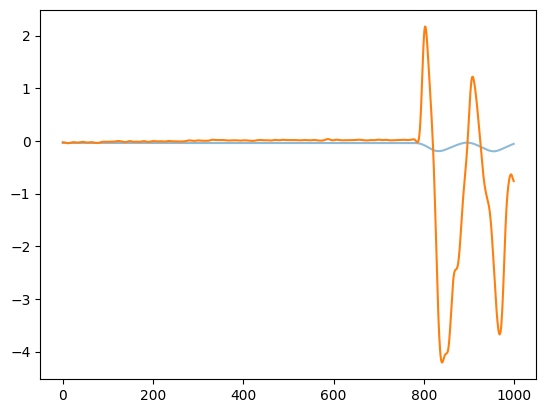

In [163]:
y_w_filt = butter_lowpass_filter(y_w, 5, 100, 3)
# plt.plot(y_w, alpha=0.5)
# plt.plot(y_w_filt + 1) 

plt.plot(y_m[1000:2000], alpha=0.5)
plt.plot(y_w_filt[1000:2000] - 1.3) 

## idle time calculation for motion monitoring system

In [172]:
'''def numDiff(data,parameters):
    fs = parameters['SamplingFrequency']
    T = 1/fs
    cutoff = parameters['HighCutoffFreq']
    order = parameters['ButterOrder']
'''

"def numDiff(data,parameters):\n    fs = parameters['SamplingFrequency']\n    T = 1/fs\n    cutoff = parameters['HighCutoffFreq']\n    order = parameters['ButterOrder']\n"

In [173]:
params = {'SamplingFrequency': 100, 'HighCutoffFreq': 7.0, 'ButterOrder': 2, 'IdleVelocityThreshold':20, 'PauseDuration':0.5}
x_mat = np.reshape(x_m, (len(x_m), 1))
y_mat = np.reshape(x_m, (len(y_m), 1))
z_mat = np.reshape(x_m, (len(z_m), 1))


In [174]:
vel_x, acc_x = numDiff(x_mat, params)
vel_y, acc_y = numDiff(y_mat, params)
vel_z, acc_z = numDiff(z_mat, params)
vel_res = np.sqrt((np.square(vel_x)) + (np.square(vel_y)) + (np.square(vel_z)))

In [175]:
vel_res.shape

(5117,)

In [176]:
# Generate Idle Time Function
def generate_Idle_time(vel_res, parameters):
    threshold = parameters['IdleVelocityThreshold']/1000 # convert value to m/sec
    sf = parameters['SamplingFrequency']
    pause_duration = parameters['PauseDuration']
    
    mHand = vel_res
    
    # Convert pause duration into a sample window size based on sampling frequency
    Du = int(pause_duration*sf)
    
    
        
    # Calculate instances in which the velocity is below the velocity threshold
    a = np.zeros(len(mHand))
    
    for i in range(len(a)):
        if mHand[i] < threshold:
            a[i] = 1
            
    idle_instances = a

    # Caculate the toal time by adding time based on if the total duration of idle >= the pause duration
    b = np.ones(int(Du))
    
    c = np.convolve(a,b)


    totalTime = 0
    for i in range(1,len(c)):
        if c[i] == Du and c[i- 1] != Du:
            totalTime = totalTime + Du
        elif c[i] == Du and c[i - 1] == Du:
            totalTime = totalTime + 1
    
    # convert time into seconds by taking the number of samples divided by the sampeling frequency
    total_idle_time = float(totalTime/sf)
    
    # Cacluate the periods in which idle time occurs
    idle_periods = np.zeros(len(a))
    
    for i in range(Du,len(a)):
        if np.sum(a[i-Du:i]) == Du:
            idle_periods[i] = 1
    
    
    return total_idle_time,idle_instances,idle_periods

In [177]:
########################################## CALCULATING IDLE TIME based on MM #########################################

In [1]:
total_idle_time_m, idle_instances_m, idle_periods_m = generate_Idle_time(vel_res, params)

NameError: name 'generate_Idle_time' is not defined

## Calculating idle time based on wireless motion sensor

### calculating velocity 

In [179]:
def get_vel(ser, samp_rate):
    prev_velocity = 0
    out = [prev_velocity]
    for i in range(1, len(ser)):
        curr_vel = (ser[i]/ samp_rate) + prev_velocity
        out.append(curr_vel)
        prev_velocity = curr_vel 
    return out

In [205]:
ibx = lambda x: np.array(x) - 2
iby = lambda x: np.array(x) - 2
ibz = lambda x: np.array(x) - 9.8

x_w_vel = get_vel(ibx(x_w), 100)
y_w_vel = get_vel(iby(y_w), 100)
z_w_vel = get_vel(ibz(z_w), 100)

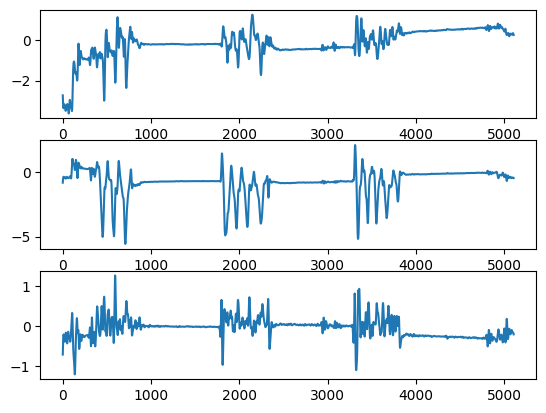

In [206]:
f, axs = plt.subplots(3)
axs[0].plot(ibx(x_w))
axs[1].plot(iby(y_w))
axs[2].plot(ibz(z_w))

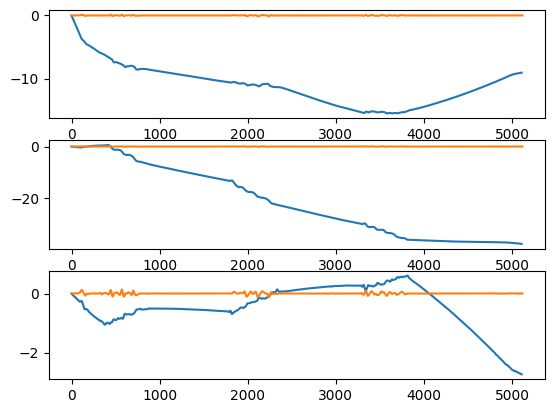

In [215]:
f, axs = plt.subplots(3)
axs[0].plot(x_w_vel)
axs[1].plot(y_w_vel)
axs[2].plot(z_w_vel)
axs[0].plot(vel_x)
axs[1].plot(vel_x)
axs[2].plot(vel_x)

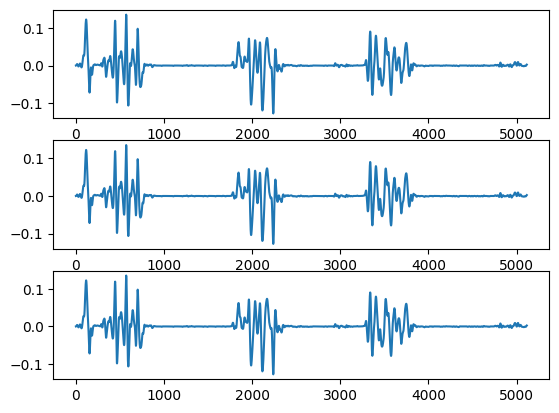

In [200]:
f, axs = plt.subplots(3)
axs[0].plot(vel_x)
axs[1].plot(vel_x)
axs[2].plot(vel_x)

In [185]:
vel_res_w = np.sqrt((np.square(x_w_vel)) + (np.square(y_w_vel)) + (np.square(z_w_vel)))

In [186]:
total_idle_time_w, idle_instances_w, idle_periods_w = generate_Idle_time(vel_res_w, params)

In [187]:
total_idle_time_m

35.0

([<matplotlib.axis.XTick at 0x29d120b20>,
 [Text(1, 0, 'RF'), Text(2, 0, 'accelerometer')])

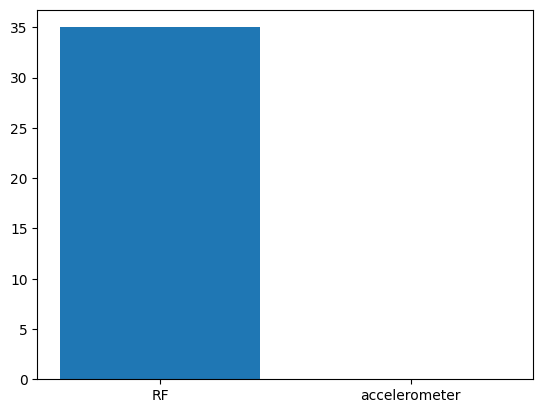

In [188]:
plt.bar([1, 2], [total_idle_time_m, total_idle_time_w])
plt.xticks([1, 2], ['RF', 'accelerometer'])

## What does acc generated from RF and accelerometer look like

In [195]:
len(x_w)

5108

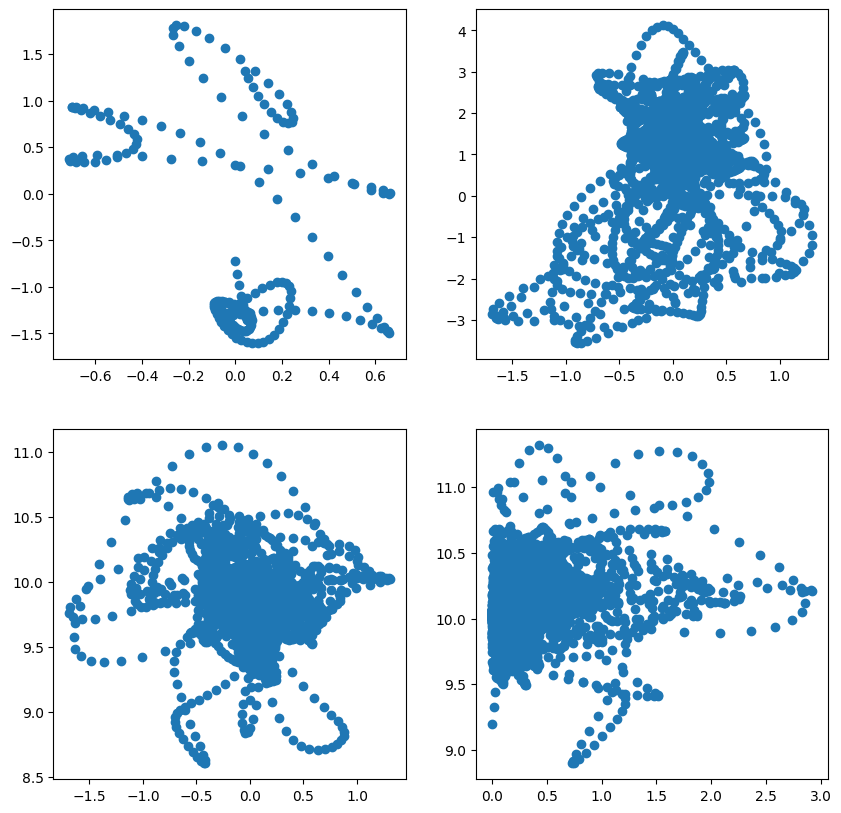

In [199]:
f, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0][0].scatter(acc_x[:200], x_w[:200])
axs[0][1].scatter(acc_y[:5108], y_w)
axs[1][0].scatter(acc_z[:5108], z_w)

acc_mag_m = np.sqrt((np.square(acc_x)) + (np.square(acc_y)) + (np.square(acc_z)))
acc_mag_w = np.sqrt((np.square(x_w)) + (np.square(y_w)) + (np.square(z_w)))

axs[1][1].scatter(acc_mag_m[:5108], acc_mag_w)

In [2]:
f, axs = plt.subplots(2)
axs[0].plot(idle_periods_m)
axs[1].plot(idle_periods_w)

NameError: name 'plt' is not defined

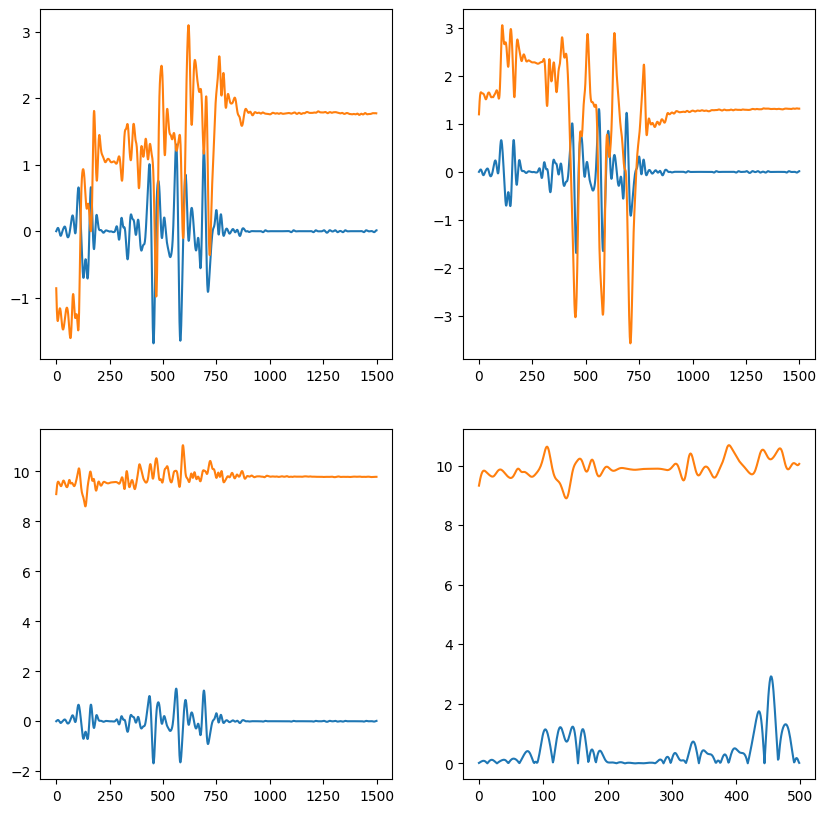

In [193]:
f, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0][0].plot(acc_x[:1500])
axs[0][0].plot(x_w[1:1500])

axs[0][1].plot(acc_y[:1500])
axs[0][1].plot(y_w[:1500])

axs[1][0].plot(acc_z[:1500])
axs[1][0].plot(z_w[:1500])

acc_mag_m = np.sqrt((np.square(acc_x)) + (np.square(acc_y)) + (np.square(acc_z)))
acc_mag_w = np.sqrt((np.square(x_w)) + (np.square(y_w)) + (np.square(z_w)))

axs[1][1].plot(acc_mag_m[1:500])
axs[1][1].plot(acc_mag_w[1:500])

### &#9658; <font color=red> Observation: acceleration plots look better. There seems tp ne some agreement in x plot (second low spike), same in yplot; idle periods seem similar <font/>